# <center> 6、深度前馈神经网络- 实施数字分类</center>

&#8195;&#8195;前馈神经网络（FNN）是一种特殊类型的神经网络，其中神经元之间的链接/连接不形成循环。因此，它与其他神经网络中的体系结构不同，我们在本书后面将进行研究（递归型神经网络）。FNN是一种广泛使用的架构，它是第一个并且最简单的神经网络。

&#8195;&#8195;在本章中，我们将介绍一个典型的FNN架构;并使用TensorFlow库进行此操作。在介绍了这些概念之后，我们将给出一个实用的数字分类的例子。这个例子的问题是，*给定一组图像包含手写数字，如何将这些图像分为10个不同的类（0-9）？*

本章将介绍以下主题：

   + **<font size=3>隐藏单元和架构设计</font>**
   + **<font size=3>MNIST数据集分析</font>**
   + **<font size=3>数字分类 - 模型构建和训练</font>**

## 隐藏单元和架构设计

&#8195;&#8195;在这一小节中，我们将回顾人工神经网络;他们可以很好地完成分类任务，例如手写数字的分类。

&#8195;&#8195;假设我们有如图1所示的神经网络：

![image.png](./1.png)

<center>图1：具有一个隐藏层的简单FNN</center> 

&#8195;&#8195;如前所述，此网络中最左边的层称为输入层，而层内的神经元称为输入神经元。最右边或输出层包含输出神经元，或者，在这种情况下，是单个输出神经元。中间层称为隐藏层，因为该层中的神经元既不是输入也不是输出。隐藏这个词听起来有点神秘 - 我第一次听到这个词时，我认为它必须有一些深刻的哲学或数学意义，但它确实意味着既不是输入也不是输出。它没有别的意思。前面的网络只有一个隐藏层，但有些网络有多个隐藏层。 例如，以下四层网络有两个隐藏层：

![image.png](./2.png)

<center>图2：具有更多隐藏层的人工神经网络</center> 

&#8195;&#8195;组织输入，隐藏和输出层的体系结构非常简单。例如，让我们通过一个实际例子来查看特定的手写图像是否包含数字9。

&#8195;&#8195;首先，我们将输入图像的像素提供给输入层; 例如，在MNIST数据集，我们有单色图像。它们中的每一个都是28乘28，所以我们需要在输入层中有28*28= 784个神经元来接收这个输入图像。

&#8195;&#8195;在输出层，我们只需要1个神经元，它产生该图像是否是数字9概率（或者得分）。例如，输出值大于0.5表示该图像具有数字9，如果它小于0.5，则表示输入图像中没有数字9。所以这种类型的网络，其中一层的输出作为输入馈送到下一层，把它之称为FNN。层中的这种顺序性就意味着其中没有循环。

## MNIST数据集分析

&#8195;&#8195;在本节中，我们将通过为手写图像实现分类器来解决问题。这种实现可以被视为*Hello Word！* 神经网络

&#8195;&#8195;MNIST是一种广泛使用的数据集，用于对机器学习技术进行基准测试。数据集包含一组手写数字，如下所示：

![image.png](./3.png)

<center>图3：MNIST数据集中的样本数字</center> 

&#8195;&#8195;因此，数据集还包括手写图像及其相应的标签。

&#8195;&#8195;在本节中，我们将对这些图像进行基本模型训练，目标是确定输入图像中手写的是哪个数字。

&#8195;&#8195;此外，你将发现我们将能够使用非常短的几行代码完成此分类任务，但是这个实现背后的想法是理解构建神经网络解决方案的基本要点。此外，我们将在此实现中介绍神经网络的主要概念。

## The MNIST data

&#8195;&#8195;MNIST数据集的官网是Yann LeCun's website(*http://yann.lecun.com/exdb/mnist/*)。幸运的是，TensorFlow提供了一些辅助函数来下载MNIST数据集，以至于可以通过使用以下两行代码来下载数据集：

In [97]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_dataset = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [98]:
#下载mnist数据集，
#运行上面的代码，会自动下载数据集并将文件解压到当前代码所在同级目录下的MNIST_data文件下
#one_hot=True,表示将样本标签转化为one_hot编码

In [99]:
print(mnist.train.images.shape,mnist.train.labels.shape)
print(mnist.test.images.shape,mnist.test.labels.shape) 
print(mnist.validation.images.shape,mnist.validation.labels.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)
(5000, 784) (5000, 10)


In [100]:
#实际的机器学习中，数据集分为三部分：
#一部分用于训练；
#一部分用于评估过程中的准确度（测试数据集）；
#一部分用于评估最终模型的准确度（验证数据集）。

&#8195;&#8195;MNIST数据集分为三部分：55,000个训练数据（mnist. train），10,000个测试数据（mnist.test）和5,000个验证数据（mnist. validation）。这种划分非常重要; 在机器学习中必不可少的是，我们要有单独的数据，我们没有从中学习，以便我们可以确保我们学到的东西实际上是一般化的！

&#8195;&#8195;如前所述，每个MNIST样本都有两部分：手写数字的图像及其相应的标签。训练集和测试集都包含图像及其相应的标签。例如，训练图像是mnist.train.images并且培训标签是mnist.train.labels。􀁎

&#8195;&#8195;每个图像是28像素乘28像素。 我们可以将其解释为一大堆数字：

![image.png](./4.png)

<center>图4：矩阵表示中的MNIST数字（强度值）</center> 

&#8195;&#8195;为了将这个像素值矩阵馈送到神经网络的输入层，我们需要将该矩阵展平为784个值的向量。 因此，数据集的最终形状将是一堆784维向量空间。

&#8195;&#8195;结果是mnist.train.images(训练图像)是一个形状为（55000,784)的张量。第一个维度是图像列表的索引，第二个维度是索引每个图像中的每个像素强度值。对于特定图像中的特定像素，张量中的每个条目是0到1之间的像素强度：

![image.png](./5.png)

<center>图5：MNIST数据分析</center> 

&#8195;&#8195;正如我们之前提到的，数据集中的每个图像都有相应的标签范围从0到9。

&#8195;&#8195;出于实现的目的，我们将标签编码为单热向量（one—hot）。one—hot向量是除了该向量的数字的索引之外的全零的向量代表。例如，3将是[0,0,0,1,0,0,0,0,0,0]。因此，mnist.train.labels是（55000,10）的浮点数组。

![image.png](./6.png)

<center>图6：MNIST数据分析</center> 

## 数字分类 - 模型构建和培训

&#8195;&#8195;现在，让我们继续构建我们的模型。 因此，我们在数据集0-9中有10个类，目标是将任何输入图像分类为其中一个类。通过仅说出它可能属于哪个类，而不是对输入图像艰难的作出决定，我们将产生10个可能值的向量（因为我们有10个类）。它表示从0到9的每个数字是输入图像的正确类的概率。

&#8195;&#8195;举个例子，假设我们为模型提供特定图像。该模型可能70％确定此图像为9，10％确定此图像为8，依此类推。所以，我们将在这里使用softmax回归，它将产生0到1之间的值。

&#8195;&#8195;softmax回归有两个步骤：首先，我们将输入的证据加在某些类中，然后我们将该证据转换为概率。

&#8195;&#8195;为了计算给定图像在特定类中的证据，我们对像素强度进行加权求和。如果这个像素具有很强的证据说明这张图片不属于该类，那么相应的权值为负数，相反如果这个像素拥有有利的证据支持这张图片属于这个类，那么权值是正数。

&#8195;&#8195;图7显示了一个模型学习到的图片上每个像素对于特定数字类的权值。红色代表负数权值，蓝色代表正数权值。

![image.png](./7.png)

<center>图7：为每个MNIST类学习的一个模型的权重</center> 

&#8195;&#8195;我们也需要加入一个额外的偏置量（bias），因为输入往往会带有一些无关的干扰量。因此对于给定的输入图片 x 它代表的是数字 i 的证据可以表示为:

![image.png](./8.png)

其中: 
+      **W**i代表权重
+      **b**i代表数字 i 类的偏置量
+      **j**&#8194;代表给定图片 x 的像素索引用于像素求和.

&#8195;&#8195;softmax函数可以把这些证据转换成我们预测的概率 y：

<center> **<font size=5>y = softmax(evidence)</font>**</center>

&#8195;&#8195;这里的softmax可以看成是一个激励（activation）函数或者链接（link）函数，把我们定义的线性函数的输出转换成我们想要的格式，也就是关于10个数字类的概率分布。因此，给定一张图片，它对于每一个数字的吻合度可以被softmax函数转换成为一个概率值。softmax函数可以定义为：

<center> **<font size=5>softmax(evidence) = normalize(exp(evidence))</font>**</center>

&#8195;&#8195;展开等式右边的子式，可以得到：

![image.png](./9.png)

&#8195;&#8195;但是更多的时候把softmax模型函数定义为前一种形式：把输入值当成幂指数求值，再正则化这些结果值。这个幂运算表示，更大的证据对应更大的假设模型（hypothesis）里面的乘数权重值。反之，拥有更少的证据意味着在假设模型里面拥有更小的乘数系数。假设模型里的权值不可以是0值或者负值。Softmax然后会正则化这些权重值，使它们的总和等于1，以此构造一个有效的概率分布。

&#8195;&#8195;对于softmax回归模型可以用下面的图解释，对于输入的xs加权求和，再分别加上一个偏置量，最后再输入到softmax函数中：

![image.png](./10.png)

<center>图8：softmax回归的可视化</center> 

&#8195;&#8195;如果把它写成一个等式，我们可以得到：

![image.png](./12.png)

<center>图9：softmax回归的方程表示</center> 

&#8195;&#8195;我们也可以用向量表示这个计算过程：用矩阵乘法和向量相加。这有助于提高计算效率和可读性：

![image.png](./13.png)

<center>图10：softmax回归方程的向量化表示</center> 

&#8195;&#8195;更进一步，可以写成更加紧凑的方式：

<center> **<font size=5>y = softmax(Wx + b)</font>**</center>

&#8195;&#8195;现在，让我们把它转变成TensorFlow可以使用的东西。

## 数据分析

&#8195;&#8195;那么，让我们继续开始实现我们的分类器。让我们从导入此实现所需的包开始：

In [102]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran

&#8195;&#8195;接下来，我们将定义一些辅助函数，使我们能够从我们下载的原始数据集中进行子集化：

In [103]:
#Define some helper functions 
# to assign the size of training and test data we will take from MNIST dataset
def train_size(size):
    print ('Total Training Images in Dataset = ' + str(mnist_dataset.train.images.shape))
    print ('############################################')
    input_values_train = mnist_dataset.train.images[:size,:]
    print ('input_values_train Samples Loaded = ' + str(input_values_train.shape))
    target_values_train = mnist_dataset.train.labels[:size,:]
    print ('target_values_train Samples Loaded = ' + str(target_values_train.shape))
    return input_values_train, target_values_train

In [104]:
def test_size(size):
    print ('Total Test Samples in MNIST Dataset = ' + str(mnist_dataset.test.images.shape))
    print ('############################################')
    input_values_test = mnist_dataset.test.images[:size,:]
    print ('input_values_test Samples Loaded = ' + str(input_values_test.shape))
    target_values_test = mnist_dataset.test.labels[:size,:]
    print ('target_values_test Samples Loaded = ' + str(target_values_test.shape))
    return input_values_test, target_values_test

&#8195;&#8195;此外，我们将定义两个辅助函数来显示来自的特定数字数据集甚至显示图像子集的展平版本：

In [105]:
#Define a couple of helper functions for digit images visualization
def visualize_digit(ind):
    print(target_values_train[ind])
    target = target_values_train[ind].argmax(axis=0)
    true_image = input_values_train[ind].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (ind, target))
    plt.imshow(true_image, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [106]:
def visualize_mult_imgs_flat(start, stop):
    imgs = input_values_train[start].reshape([1,784])
    for i in range(start+1,stop):
        imgs = np.concatenate((imgs, input_values_train[i].reshape([1,784])))
    plt.imshow(imgs, cmap=plt.get_cmap('gray_r'))
    plt.show()

&#8195;&#8195;现在，让我们开始讨论架构并开始使用数据集。 我们将定义我们希望从原始数据集加载的训练和测试的示例。

&#8195;&#8195;现在，我们将开始构建和培训模型的架构。 首先，我们定义我们想要加载多少训练和测试示例的变量。然后，我们将加载所有数据，但我们后面将更改此值以节省资源：

In [107]:
input_values_train, target_values_train = train_size(55000)

Total Training Images in Dataset = (55000, 784)
############################################
input_values_train Samples Loaded = (55000, 784)
target_values_train Samples Loaded = (55000, 10)


&#8195;&#8195;所以现在，我们有一个55,000个手写数字样本的训练集，每个样本是28×28像素图像，被扁平化为784维向量。 我们还有一个one-hot热门编码格式的相应标签。

&#8195;&#8195;target_values_train目标训练集数据是所有的input_values_train输入训练集数据标签的样本。 在以下示例中，数组代表7的one-hot编码格式：

![image.png](./14.png)

<center>图11：数字7的one—hot编码</center> 

&#8195;&#8195;因此，让我们可视化数据集中的随机图像并查看其外观，我们将使用前面的辅助函数来显示数据集中的随机数字：

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


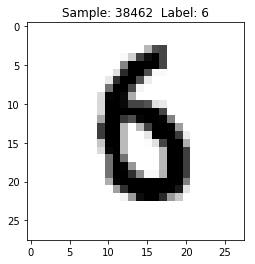

In [109]:
visualize_digit(ran.randint(0, input_values_train.shape[0]))

<center>图12：可视化模型的输出数字</center> 


#从数据集中可视化一个随机数字和它的图像

&#8195;&#8195;我们还可以使用之前定义的辅助函数来可视化一堆展平的图像。展平向量中的每个值表示图片像素强度，因此可视化像素看起来像这样：

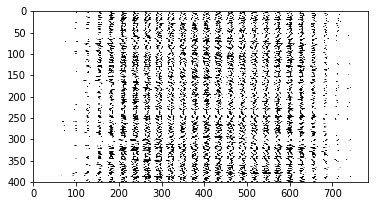

In [110]:
visualize_mult_imgs_flat(0,400)

<center>图13：前400个训练样本</center> 

#前400个训练样本的像素点强度值
#横轴表示784个像素点
#纵轴表示400个训练样本

## 模型构建

&#8195;&#8195;到目前为止，我们尚未开始为此分类器构建计算图。 让我们从创建会话变量开始，该变量将负责执行我们要构建的计算图：

In [112]:
#创建负责执行的会话变量
sess = tf.Session()

&#8195;&#8195;接下来，我们将定义模型的占位符，这些占位符将用于将数据提供给计算图：

In [113]:
input_values = tf.placeholder(tf.float32, shape=[None, 784])
#定义模型的占位符，用于向计算图中提供数据
#None，表示张量的第一个维度可以是任何长度，即表示能够输入任意数量的MNIST图像，每一张图像展平成784维的向量

&#8195;&#8195;当我们在占位符的第一维中指定None时，它意味着占位符可以我们选择喜欢的尽可能多的例子。 在这种情况下，我们的占位符可以是任意数量示例，其中每个示例都具有784个强度值。

&#8195;&#8195;现在，我们需要定义另一个占位符来提供图像标签。 我们稍后也会使用此占位符将图像的模型预测与实际标签进行比较：

In [114]:
output_values = tf.placeholder(tf.float32, shape=[None, 10])
#定义用于填充图像标签的占位符

&#8195;&#8195;接下来，我们将定义weights和biases。这两个变量将是我们神经网络的可训练参数，它们将是对看不见的数据进行预测所需的唯一两个变量：

In [115]:
weights = tf.Variable(tf.zeros([784,10]))
biases = tf.Variable(tf.zeros([10]))
#Variable代表一个可修改的张量
#可以用于计算输入值，也可以在计算中被修改。对于各种机器学习应用，一般都会用Variable表示模型参数
#注意，w和b是训练参数。W的维度是[784，10]，因为我们想要用784维的图片向量乘以它以得到一个10维的证据值向量，每一位对应不同数字类。
#b的形状是[10]，所以我们可以直接把它加到输出上面。

&#8195;&#8195;我想把这些weights权重作为每个数字的10个知识点列表。 这类似于一个老师使用知识点列表对多项选择考试进行评分。

&#8195;&#8195;我们现在softmax回归进行定义，它是我们的分类器函数。 这个特定的分类器称为多项逻辑回归，我们通过将数字的扁平版本乘以权重然后加偏差来进行预测：

In [116]:
softmax_layer = tf.nn.softmax(tf.matmul(input_values,weights) + biases)
#定义softmax 回归，作为分类函数
#我们用tf.matmul(X，W)表示矩阵x乘以W，对应之前等式里面的X*W ,然后再加上b，把和输入到tf.nn.softmax函数里面。

&#8195;&#8195;首先，让我们忽略softmax并查看softmax函数内部的内容。matmul是用于乘法矩阵的TensorFlow函数。如果你知道矩阵乘法（*https://en.wikipedia.org/wiki/Matrix_multiplication*），你会明白这样计算的恰到好处。

![image.png](./11.png)

&#8195;&#8195;将导致一些训练样例（m）*类别数（n）的矩阵：

![image.png](./17.png)

<center>图14：简单矩阵乘法</center> 

&#8195;&#8195;可以通过评估sofmax层来确认它：

In [117]:
print(softmax_layer)

Tensor("Softmax_4:0", shape=(?, 10), dtype=float32)


&#8195;&#8195;现在，让我们试验我们之前定义的来自训练集的三个样本的计算图，看看它是如何工作的。 执行计算图，我们需要使用之前定义的会话变量。我们需要使用初始化变量tf.global_variables_initializer()

&#8195;&#8195;让我们继续，只将三个样本提供给计算图：

In [118]:
input_values_train, target_values_train = train_size(3)
sess.run(tf.global_variables_initializer())
#If using TensorFlow prior to 0.12 use:
#sess.run(tf.initialize_all_variables())
print(sess.run(softmax_layer, feed_dict={input_values: input_values_train}))

Total Training Images in Dataset = (55000, 784)
############################################
input_values_train Samples Loaded = (3, 784)
target_values_train Samples Loaded = (3, 10)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


&#8195;&#8195;在这里，可以看到提供给它的三个训练样本的模型预测。 目前，该模型对我们的任务一无所知，因为我们还没有经历过训练过程，所以它只输出10％的概率，每个数字是输入样本的正确类。

&#8195;&#8195;正如我们之前提到的，softmax是一个激活函数，可以将输出压缩为介于0和1之间的值，而softmax的TensorFlow实现，确保了所有单个输入样本的概率总和为1。

&#8195;&#8195;让我们用TensorFlow的softmax函数进行一些实验：

In [119]:
sess.run(tf.nn.softmax(tf.zeros([4])))

array([0.25, 0.25, 0.25, 0.25], dtype=float32)

In [120]:
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2])))

array([0.11634309, 0.10579926, 0.7778576 ], dtype=float32)

&#8195;&#8195;接下来，我们需要为这个模型定义我们的损失函数，它将衡量我们的分类器在尝试为输入图像分配类时的好坏。通过比较数据集中的实际值和我们从模型得到的预测来计算模型的准确率。

&#8195;&#8195;目标是减少实际值和预测值之间的任何错误分类。

&#8195;&#8195;交叉熵定义为：

![image.png](./18.png)

其中：
+    y 是我们预测的概率分布
+    y'是实际的分布（我们输入的one-hot向量的数字标签)。

&#8195;&#8195;比较粗糙的理解是，交叉熵是用来衡量我们的预测用于描述真相的低效性。

&#8195;&#8195;我们可以实现交叉熵函数：

In [121]:
model_cross_entropy = tf.reduce_mean(-tf.reduce_sum(output_values * tf.log(softmax_layer), reduction_indices=[1]))

In [122]:
#将生成的预测y与实际样本标签y'进行交叉熵运算，然后取平均值

&#8195;&#8195;此函数从softmax层（其值范围从0到1）中获取所有预测的对数，并通过示例的真值将它们与元素相乘(*https://en.wikipedia.org/wiki/Hadamard_product_%287matrices%29*)。如果每个值的log函数接近于零，则它将使此值为一个大的负数（-np.log(0.01)=4.6），如果它接近于1，则它将使值为小一个的负数（-np.log(0.09)=0.1）：

![image.png](./19.png)

<center>图15：y=log(x)的可视化</center>

&#8195;&#8195;如果预测的话，我们基本上会对分类器进行非常大的惩罚；如果预测是确信的，负数值非常小，那么预测不确信心，则负数非常大。

&#8195;&#8195;这是一个softmax预测的简单Python示例，它非常确定数字是3：

In [123]:
j = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]

&#8195;&#8195;让我们创建一个数字3的标签数组作为基础事实，与我们的softmax函数进行比较：

In [124]:
k = [0,0,0,1,0,0,0,0,0,0]

&#8195;&#8195;你能猜出我们的损失函数给我们的价值吗？ 你能看到log（j）如何以较大的负数惩罚错误的答案吗？ 试试用这个来理解：

In [125]:
-np.log(j)
-np.multiply(np.log(j),k)

array([0.        , 0.        , 0.        , 0.10536052, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

&#8195;&#8195;这将返回数值9个0和0.1053; 当他们全部总结时，我们可以认为这是一个很好的预测。 注意当我们对实际的2进行相同的预测时会发生什么：

In [126]:
k = [0,0,1,0,0,0,0,0,0,0]
np.sum(-np.multiply(np.log(j),k))
#k=2

4.605170185988091

&#8195;&#8195;现在，我们的交叉熵函数给出了4.6051，它显示了一个严重的惩罚，制作不佳的预测。 由于分类器非常确信它是2时实际上是3，所以它受到了严厉的惩罚。

&#8195;&#8195;接下来，我们开始训练我们的分类器。 为了训练它，我们必须选择适当的W和b的值才会给我们带来最低的损失。

&#8195;&#8195;以下是我们现在可以根据需要为培训分配自定义变量的地方。所有大写字母中的任何值都设计为可以更改和变动。 事实上，我鼓励这样做！ 首先，使用这些值，然后注意当使用较少的训练示例太高或太低的学习率时会发生什么：

In [127]:
input_values_train, target_values_train = train_size(5500)
input_values_test, target_values_test = test_size(10000)
learning_rate = 0.1
num_iterations = 2500

Total Training Images in Dataset = (55000, 784)
############################################
input_values_train Samples Loaded = (5500, 784)
target_values_train Samples Loaded = (5500, 10)
Total Test Samples in MNIST Dataset = (10000, 784)
############################################
input_values_test Samples Loaded = (10000, 784)
target_values_test Samples Loaded = (10000, 10)


In [128]:
#学习率为0.1
#迭代次数为2500

&#8195;&#8195;我们现在可以初始化所有变量，以便我们的TensorFlow图可以使用它们：

In [129]:
init = tf.global_variables_initializer()
sess.run(init)

&#8195;&#8195;接下来，我们需要使用梯度下降算法训练分类器。 所以我们先定义我们的训练方法和一些用于测量模型精度的变量。训练变量将以选定的学习率执行梯度下降优化器最小化模型损失函数model_cross_entropy:

In [130]:
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(model_cross_entropy)
model_correct_prediction = tf.equal(tf.argmax(softmax_layer,1), tf.argmax(output_values,1))
model_accuracy = tf.reduce_mean(tf.cast(model_correct_prediction, tf.float32))

In [131]:
#通过梯度下降的优化方法寻找能够使误差最小化的b偏差和w的偏移量
#更新b和w，使其调整为合适的参数。
#整个过程就是不断地让损失loss变小，因为损失值越小，才能表明输出的结果跟标签数据越相近。当loss小到我们的需求时，这时的b和w就是训练出来的合适值。
#正确率，就是用正确的个数除以总个数，得到的值即为正确率，由于是one-hot编码，这里用argmax函数返回预测值概率最大和实际值onehot编码中数值为1的元素
#下标，看两者是否相等，相等记为1，不相等记为0，然后求均值。

## 模型训练

&#8195;&#8195;现在，我们将定义一个迭代num_iterations次数的循环。对于每个循环，它训练的运行，从input_values_train(输入的训练值）和target_values_train(目标训练值)提供值给feed_dict。

&#8195;&#8195;为了计算的准确性，它将根据中隐藏的数据测试模型：

In [132]:
for i in range(num_iterations+1):
    sess.run(train, feed_dict={input_values: input_values_train, output_values: target_values_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' +
              str(sess.run(model_accuracy, feed_dict={input_values: input_values_test,
              output_values: target_values_test})) + '  Loss = ' + 
              str(sess.run(model_cross_entropy, {input_values: input_values_train,
              output_values: target_values_train})))

Training Step:0  Accuracy =  0.5988  Loss = 2.1881988
Training Step:100  Accuracy =  0.8647  Loss = 0.5802968
Training Step:200  Accuracy =  0.879  Loss = 0.45982155
Training Step:300  Accuracy =  0.8866  Loss = 0.40857223
Training Step:400  Accuracy =  0.8904  Loss = 0.3780811
Training Step:500  Accuracy =  0.8943  Loss = 0.35697538
Training Step:600  Accuracy =  0.8974  Loss = 0.34104994
Training Step:700  Accuracy =  0.8984  Loss = 0.32834953
Training Step:800  Accuracy =  0.9  Loss = 0.3178265
Training Step:900  Accuracy =  0.9005  Loss = 0.30886242
Training Step:1000  Accuracy =  0.9009  Loss = 0.30106452
Training Step:1100  Accuracy =  0.9023  Loss = 0.29417017
Training Step:1200  Accuracy =  0.9029  Loss = 0.287995
Training Step:1300  Accuracy =  0.9033  Loss = 0.2824061
Training Step:1400  Accuracy =  0.9039  Loss = 0.27730307
Training Step:1500  Accuracy =  0.9048  Loss = 0.2726099
Training Step:1600  Accuracy =  0.9057  Loss = 0.26826677
Training Step:1700  Accuracy =  0.9062

In [133]:
#for循环迭代2500次，每100次输出打印一次
#损失值，用计算损失值的交叉熵结果来表示。
#注意，这里的交叉熵不仅用来衡量单一的一对预测和真实值，而是所有100幅图片的交叉熵的总和。
#对于100个数据点的预测表现比单一数据点的表现能更好地描述我们的模型的性能

&#8195;&#8195;注意损失值在接近结束时是如何减少的，但同时我们的准确率也略有下降！这表明我们仍然可以最大限度地减少损失，从而最大限度地提高训练数据的准确率，但这可能无法帮助我们用于预测测试数据的精度。这也称为过度拟合。使用默认设置，我们得到的准确率约为91％。 如果我想作弊以获得94％的准确率，我可以设置测试示例为100.这表明没有足够的测试示例可以给你一个准确率的偏差。

&#8195;&#8195;请记住，这是计算分类器性能的一种非常不准确的方法。但是，为了学习和实验，我们是故意而为之。理想的情况下，在使用大型数据集进行培训时，一次使用小批量的训练数据进行培训，而不是一次全部。

&#8195;&#8195;这是有趣的部分。 现在我们已经计算了我们的权重信息，我们可以使用以下代码创建图形：

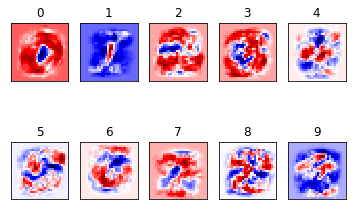

In [134]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(weights)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

<center>图16：可视化数字0-9的权重</center> 

In [135]:
#热力图可视化权重

&#8195;&#8195;上图显示了数字0-9模型的权重，这是我们分类器中最重要的一面。完成所有这些机器学习工作以确定最佳权重是多少。 一旦根据优化标准计算出它们，您就会有一个信息列表，并可以使用学习的权重轻松找到您的答案。

&#8195;&#8195;学习模型通过比较输入的相似或不同来进行预测，数字样本的权重是红色和蓝色。红色越深，越能确定，效果越好; 白色中立而蓝色意味着失误。

&#8195;&#8195;现在，让我们使用信息列表，看看我们的模型如何在其上执行：

Total Training Images in Dataset = (55000, 784)
############################################
input_values_train Samples Loaded = (1, 784)
target_values_train Samples Loaded = (1, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


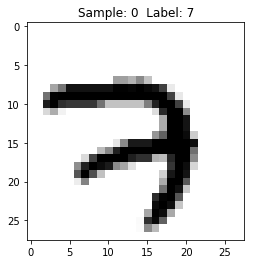

In [136]:
input_values_train, target_values_train = train_size(1)
visualize_digit(0)

<center>图17：第0个样本的标签和它的可视化</center> 

&#8195;&#8195;让我们看看我们的softmax预测器：

In [137]:
answer = sess.run(softmax_layer, feed_dict={input_values: input_values_train})
print(answer)

[[2.12480500e-05 1.16469355e-05 8.96317661e-02 1.92015395e-02
  8.20864807e-04 1.25168417e-05 3.85382264e-05 8.53745937e-01
  6.91889087e-03 2.95969862e-02]]


&#8195;&#8195;前面的代码将为我们提供一个10列的向量，每列包含一个概率：

[[2.1248012e-05 1.1646927e-05 8.9631692e-02 1.9201526e-02 8.2086492e-04
  1.2516821e-05 3.8538201e-05 8.5374612e-01 6.9188857e-03 2.9596921e-02]] 

&#8195;&#8195;我们可以使用argmax函数找出最可能的数字,看到我们输入图像的分类正确的：

In [138]:
answer.argmax()

7

&#8195;&#8195;现在，我们从神经网络中获得了正确的分类。

&#8195;&#8195;让我们用我们的知识来定义一个辅助函数，它可以从数据集中选择一个随机图像并根据它测试模型：

In [139]:
def display_result(ind):
    
    # Loading a training sample
    input_values_train = mnist_dataset.train.images[ind,:].reshape(1,784)
    target_values_train = mnist_dataset.train.labels[ind,:]
    
    # getting the label as an integer instead of one-hot encoded vector
    label = target_values_train.argmax()
    
    # Getting the prediction as an integer
    prediction = sess.run(softmax_layer, feed_dict={input_values: input_values_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(input_values_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

&#8195;&#8195;现在尝试一下：

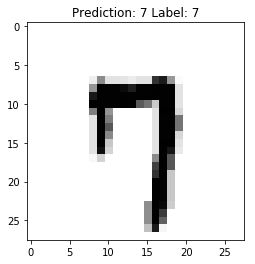

In [140]:
display_result(ran.randint(0, 55000))

<center>图18：随机样本的预测值、标签和它的可视化</center> 

&#8195;&#8195;我们再次获得了正确的分类！

## 总结

&#8195;&#8195;在本章中，我们对数字进行了FNN的基本实现分类任务。 我们还回顾了神经网络中使用的术语。

&#8195;&#8195;接下来，我们将使用一些现代最佳实践和一些技巧来构建数字分类模型的复杂版本，以增强模型的性能。

<center>学号</center> |<center>姓名</center> |<center>专业</center> 
-|-|-
201802210513|杨莎莎|应用统计
201802210502|郭力博|应用统计
201802210517|<center>雒  腾</center>|应用统计
<br>